<a href="https://colab.research.google.com/github/hockyy/cifar10/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today, I'm going to do my first image classification using tensorflow and keras on the cifar10 dataset.


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cifar10 = datasets.cifar10.load_data() 
(X_train, y_train), (X_test, y_test) = cifar10
X_train = X_train / 255
X_test = X_test / 255
cifar10_classes =  ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
y_train = y_train.flatten()
y_test = y_test.flatten()

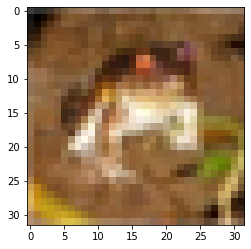

In [ ]:
plt.imshow(X_train[0]) 
plt.show()
# This is a frog

In [ ]:
display(X_train.shape) 
# There are 50000 images, each of those are size 32 * 32, 3 channels
display(y_train.shape)
# There are 50000 labels
display(y_train[0])

(50000, 32, 32, 3)

(50000,)

6

airplane : 0.  
automobile : 1.   
bird : 2.   
cat : 3.   
deer : 4.   
dog : 5.   
frog : 6.   
horse : 7.   
ship : 8.   
truck : 9.   

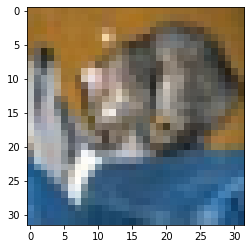

3

In [ ]:
plt.imshow(X_test[0])
plt.show()
display(y_test[0])

In [ ]:
def plot_sample(X, y, index):
  plt.imshow(X[index])
  print(y[index])
  plt.xlabel(cifar10_classes[y[index]])
  plt.show()

6


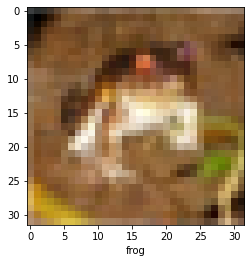

In [ ]:
plot_sample(X_train, y_train, 0)

0


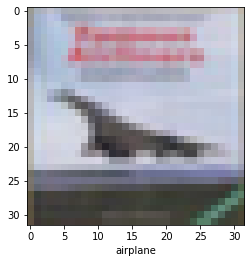

In [ ]:
plot_sample(X_test, y_test, 3)

Now, let's build the model

In [ ]:
model = models.Sequential([
                          layers.Flatten(input_shape=(32,32,3)),
                          layers.Dense(3000, activation='relu'),
                          layers.Dense(1000, activation='relu'),
                          layers.Dense(10, activation='sigmoid')
                        ])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 1)

1563/1563 [==============================] - 11s 7ms/step - loss: 1.8137 - accuracy: 0.3555


In [ ]:

import time    
def save_model(model):
  epoch_time = int(time.time())
  model.save(f"{epoch_time}")

In [ ]:
save_model(model)

INFO:tensorflow:Assets written to: 1650427653/assets


In [ ]:
model = models.load_model("1650427653")
model.fit(X_train, y_train, epochs = 1)
save_model(model)

1563/1563 [==============================] - 150s 96ms/step - loss: 1.6261 - accuracy: 0.4257
INFO:tensorflow:Assets written to: 1650428117/assets


In [ ]:
import os
checkpoint_path = "coba/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(X_train, 
          y_train,  
          epochs=3,
          callbacks=[cp_callback])  # Pass callback to training

Epoch 1/3
1563/1563 [==============================] - ETA: 0s - loss: 1.5561 - accuracy: 0.4514
Epoch 1: saving model to coba/cp.ckpt
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5561 - accuracy: 0.4514
Epoch 2/3
1558/1563 [============================>.] - ETA: 0s - loss: 1.4958 - accuracy: 0.4742
Epoch 2: saving model to coba/cp.ckpt
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4961 - accuracy: 0.4742
Epoch 3/3
1558/1563 [============================>.] - ETA: 0s - loss: 1.4442 - accuracy: 0.4953
Epoch 3: saving model to coba/cp.ckpt
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4440 - accuracy: 0.4953


In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred] # Gives each class a probability, prediction is the max index


In [ ]:
# print(y_pred)
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.49      0.55      1000
           1       0.61      0.61      0.61      1000
           2       0.54      0.10      0.17      1000
           3       0.40      0.18      0.24      1000
           4       0.33      0.59      0.42      1000
           5       0.32      0.55      0.41      1000
           6       0.50      0.58      0.54      1000
           7       0.53      0.57      0.55      1000
           8       0.66      0.58      0.62      1000
           9       0.59      0.53      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



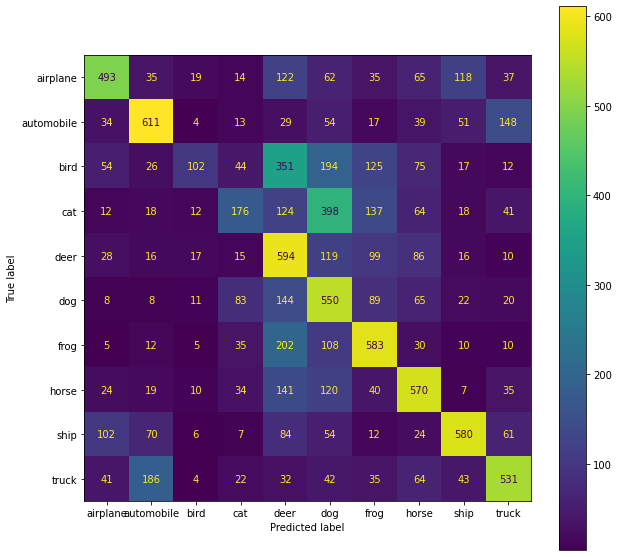

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(cm, display_labels=cifar10_classes)
disp.plot(ax=ax)
plt.show()


In [ ]:
cnn = models.Sequential([                  
  # cnn
  layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32,32,3)),
  layers.MaxPool2D((2, 2)),

  layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
  layers.MaxPool2D((2, 2)),
  
  # Dense layer  
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dense(10, activation='softmax'),
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_checkpoint_path = "cnn_model/hocky1.ckpt"
cnn.fit(X_train, y_train, epochs=10)
cnn.save_weights(cnn_checkpoint_path) 

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4410 - accuracy: 0.8474
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2995 - accuracy: 0.8970
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2020 - accuracy: 0.9328
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1370 - accuracy: 0.9532
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1058 - accuracy: 0.9640
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0892 - accuracy: 0.9695
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0843 - accuracy: 0.9719
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0677 - accuracy: 0.9776
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0646 - accuracy: 0.9786
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - 

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred] # Gives each class a probability, prediction is the max index


In [ ]:
# print(y_pred)
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.67      0.73      1000
           1       0.79      0.81      0.80      1000
           2       0.64      0.57      0.61      1000
           3       0.50      0.60      0.54      1000
           4       0.62      0.66      0.64      1000
           5       0.62      0.59      0.61      1000
           6       0.78      0.78      0.78      1000
           7       0.70      0.80      0.75      1000
           8       0.87      0.71      0.78      1000
           9       0.76      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



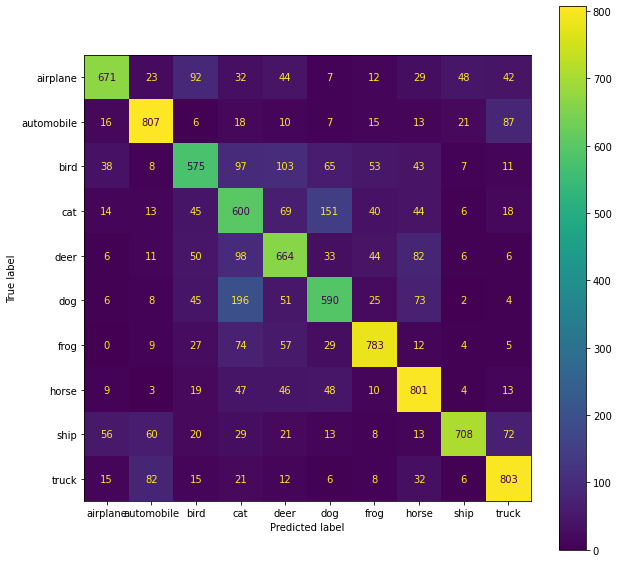

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(cm, display_labels=cifar10_classes)
disp.plot(ax=ax)
plt.show()
